In [1]:
# ANGELO DAVID PADILLA ROMERO_BOOTCAMP-IA_NIVEL-AVANZADO_TALENTOTECH - INSTRUCTOR: CRISTIAN CAMILO TIRADO CIFUENTES - 2024

!pip install scikit-learn tensorflow pandas numpy matplotlib seaborn kaggle requests

In [2]:
# Descarga del dataset desde Kaggle

import subprocess

kaggle_url = "sid321axn/gold-price-prediction-dataset"
subprocess.run(['kaggle', 'datasets', 'download', '-d', kaggle_url])

!unzip gold-price-prediction-dataset.zip

Archive:  gold-price-prediction-dataset.zip
  inflating: FINAL_USO.csv           


In [3]:
# Carga de datos y exploración

import pandas as pd

# Cargar los datos
data = pd.read_csv('FINAL_USO.csv')

# Mostrar información básica del dataset
data.info()
data.describe()
print(data.columns)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
# Selección de columnas y preprocesamiento

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Seleccionar la columna 'Adj Close'
data = data[['Date', 'Adj Close']]

# Convertir 'Date' a datetime
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])

# Ordenar por fecha
data = data.sort_values('Date')

# Eliminar la columna 'Date'
data = data.drop('Date', axis=1)

# Escalar los datos utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Creación de secuencias

def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [7]:
# División del conjunto de datos

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Epoch 1/10
42/42 [==============================] - 5s 41ms/step - loss: 0.0135
Epoch 2/10
42/42 [==============================] - 2s 40ms/step - loss: 0.0017
Epoch 3/10
42/42 [==============================] - 2s 40ms/step - loss: 0.0014
Epoch 4/10
42/42 [==============================] - 2s 42ms/step - loss: 0.0013
Epoch 5/10
42/42 [==============================] - 2s 39ms/step - loss: 0.0012
Epoch 6/10
42/42 [==============================] - 2s 39ms/step - loss: 0.0011
Epoch 7/10
42/42 [==============================] - 2s 39ms/step - loss: 0.0011
Epoch 8/10
42/42 [==============================] - 2s 38ms/step - loss: 9.9228e-04
Epoch 9/10
42/42 [==============================] - 2s 40ms/step - loss: 9.8282e-04
Epoch 10/10
42/42 [==============================] - 2s 41ms/step - loss: 9.2178e-04
Epoch 1/10
42/42 [==============================] - 5s 39ms/step - loss: 0.0214
Epoch 2/10
42/42 [==============================] - 2s 41ms/step - loss: 8.6935e-04
Epoch 3/10
42/42 [=====

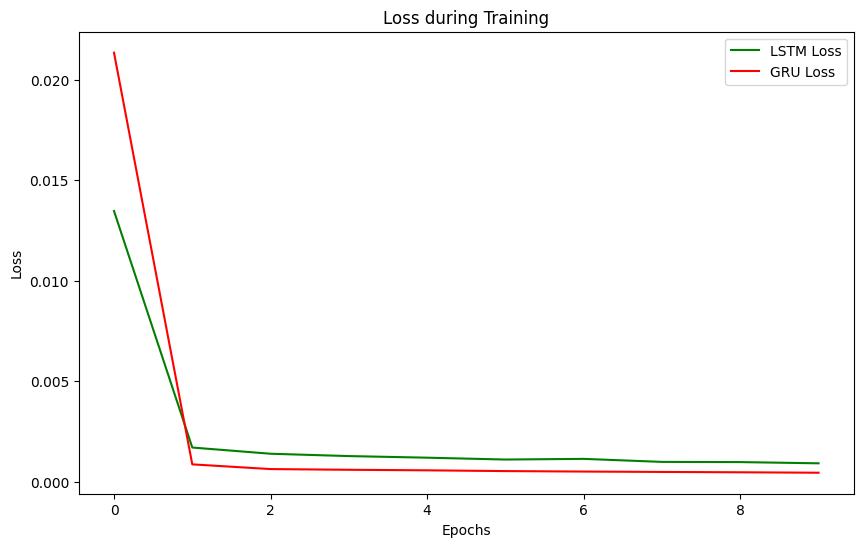

In [17]:
# Modelos LSTM y GRU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt

# Modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo LSTM y almacenar el historial
history_lstm = lstm_model.fit(X_train, y_train, batch_size=32, epochs=10)

# Modelo GRU
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dense(25))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo GRU y almacenar el historial
history_gru = gru_model.fit(X_train, y_train, batch_size=32, epochs=10)

# Graficar las pérdidas (loss)
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='green')
plt.plot(history_gru.history['loss'], label='GRU Loss', color='red')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Predicción y evaluación

import matplotlib.pyplot as plt

# Predicciones usando LSTM
predictions_lstm = lstm_model.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Predicciones usando GRU
predictions_gru = gru_model.predict(X_test)
predictions_gru = scaler.inverse_transform(predictions_gru)

predicted_price = scaler.inverse_transform(
    lstm_model.predict(X_test)
).flatten()

print("Gold Price Prediction:")
predicted_price

11/11 [==============================] - 0s 15ms/step
Gold Price Prediction:


array([123.56314 , 123.877304, 124.31178 , 124.796906, 125.41059 ,
       125.96974 , 126.58162 , 127.1432  , 127.43134 , 127.56932 ,
       127.4982  , 127.36564 , 127.137054, 126.750046, 126.33436 ,
       125.83486 , 125.238815, 124.70327 , 124.387215, 124.08822 ,
       123.71647 , 123.36671 , 123.00134 , 122.590164, 122.2307  ,
       121.87284 , 121.61305 , 121.53911 , 121.61758 , 121.82287 ,
       122.09753 , 122.485245, 122.816765, 123.00028 , 123.03248 ,
       123.044685, 122.9606  , 122.847176, 122.677124, 122.49164 ,
       122.20976 , 121.957184, 121.767624, 121.58688 , 121.475136,
       121.42314 , 121.35502 , 121.390656, 121.438835, 121.53485 ,
       121.701004, 121.79111 , 121.84826 , 121.90493 , 121.93969 ,
       121.95701 , 122.11058 , 122.16903 , 122.1892  , 122.29738 ,
       122.41281 , 122.57427 , 122.74403 , 122.82323 , 122.74561 ,
       122.632835, 122.465096, 122.19305 , 121.86079 , 121.364265,
       120.820206, 120.2526  , 119.74133 , 119.415985, 119.209

11/11 [==============================] - 0s 14ms/step
   Predicted Adj Close (LSTM)  Actual Adj Close
0                  123.563141        124.360001
1                  123.877304        125.820000
2                  124.311783        126.059998
3                  124.796906        127.459999
4                  125.410591        126.809998


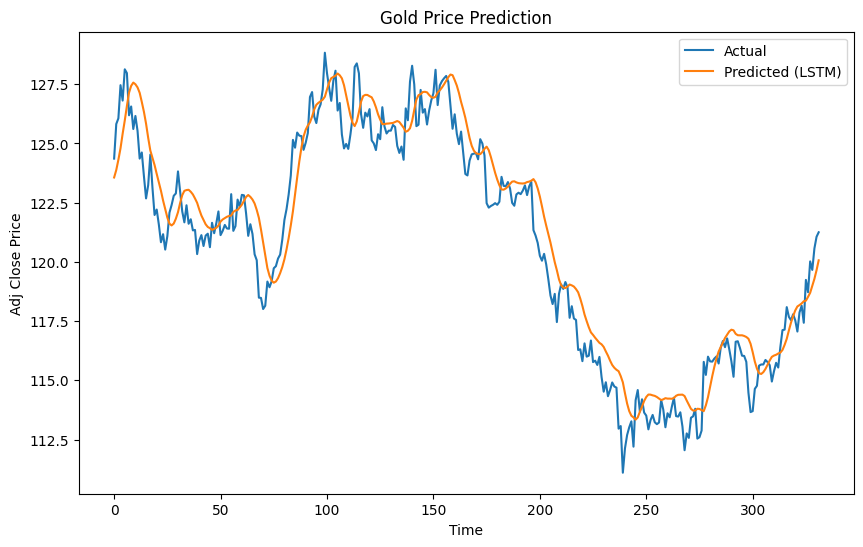

In [19]:
# Generación de predicciones para la columna 'Adj Close' usando LSTM

# Generar predicciones para la columna 'Adj Close' (X_test)
predictions_lstm = lstm_model.predict(X_test)

# Invertir el escalado de los datos
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Generar un DataFrame con las predicciones
result_df = pd.DataFrame({
    'Predicted Adj Close (LSTM)': predictions_lstm.flatten(),
    'Actual Adj Close': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
})

# Mostrar las primeras filas del DataFrame
print(result_df.head())

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10,6))
plt.plot(result_df['Actual Adj Close'], label='Actual')
plt.plot(result_df['Predicted Adj Close (LSTM)'], label='Predicted (LSTM)')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

11/11 [==============================] - 0s 11ms/step
   Predicted Adj Close (GRU)  Actual Adj Close
0                 124.097565        124.360001
1                 124.355095        125.820000
2                 125.042091        126.059998
3                 125.624176        127.459999
4                 126.518173        126.809998


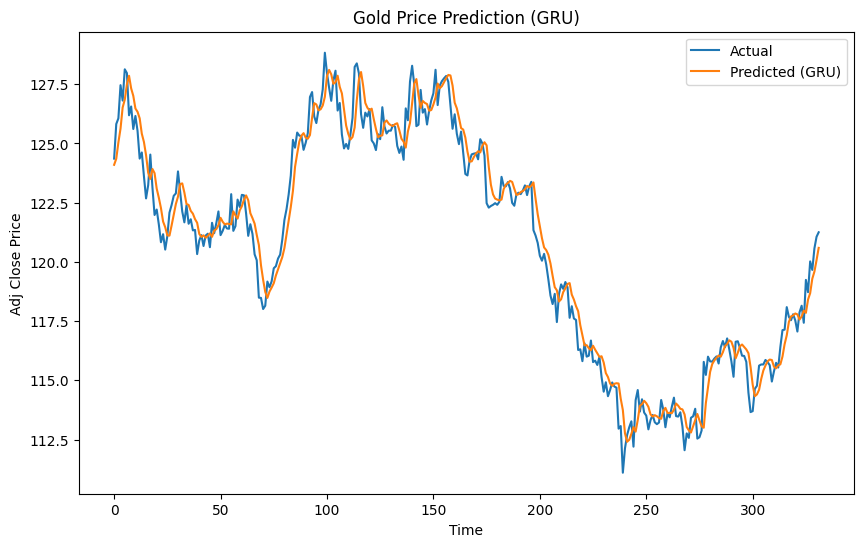

In [20]:
# Generar predicciones para la columna 'Adj Close' (X_test) usando GRU
predictions_gru = gru_model.predict(X_test)

# Invertir el escalado de los datos
predictions_gru = scaler.inverse_transform(predictions_gru)

# Generar un DataFrame con las predicciones
result_df_gru = pd.DataFrame({
    'Predicted Adj Close (GRU)': predictions_gru.flatten(),
    'Actual Adj Close': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
})

# Mostrar las primeras filas del DataFrame
print(result_df_gru.head())

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10,6))
plt.plot(result_df_gru['Actual Adj Close'], label='Actual')
plt.plot(result_df_gru['Predicted Adj Close (GRU)'], label='Predicted (GRU)')
plt.title('Gold Price Prediction (GRU)')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


11/11 [==============================] - 0s 10ms/step
   Actual Adj Close  Predicted Adj Close (LSTM)  Predicted Adj Close (GRU)
0        124.360001                  123.563141                 124.097565
1        125.820000                  123.877304                 124.355095
2        126.059998                  124.311783                 125.042091
3        127.459999                  124.796906                 125.624176
4        126.809998                  125.410591                 126.518173


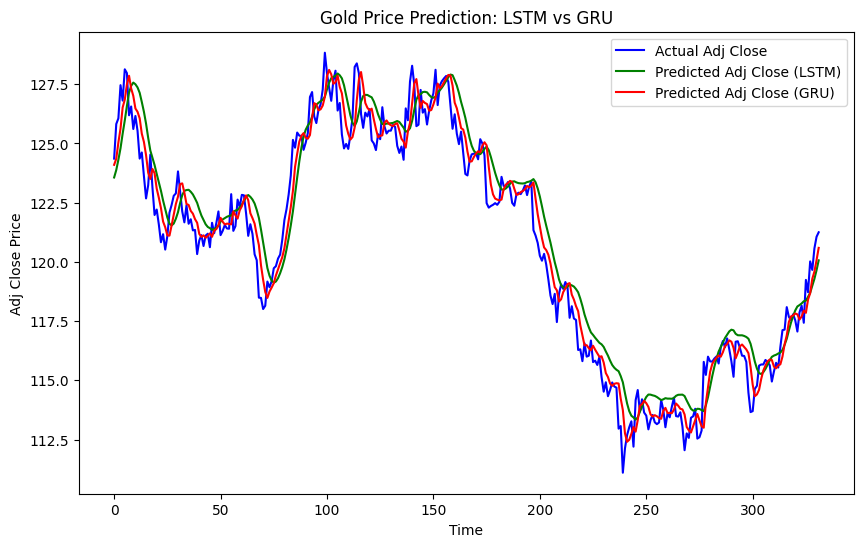

In [22]:
# Comparación de predicciones de los modelos LSTM y GRU

# Generar predicciones para LSTM
predictions_lstm = lstm_model.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Generar predicciones para GRU
predictions_gru = gru_model.predict(X_test)
predictions_gru = scaler.inverse_transform(predictions_gru)

# Obtener los valores reales de 'Adj Close'
actual_adj_close = scaler.inverse_transform(y_test.reshape(-1, 1))

# Crear un DataFrame con las predicciones y los valores reales
result_df_comparison = pd.DataFrame({
    'Actual Adj Close': actual_adj_close.flatten(),
    'Predicted Adj Close (LSTM)': predictions_lstm.flatten(),
    'Predicted Adj Close (GRU)': predictions_gru.flatten()
})

# Mostrar las primeras filas del DataFrame
print(result_df_comparison.head())

# Graficar las predicciones de LSTM y GRU vs los valores reales
plt.figure(figsize=(10,6))

plt.plot(result_df_comparison['Actual Adj Close'], label='Actual Adj Close', color='blue')
plt.plot(result_df_comparison['Predicted Adj Close (LSTM)'], label='Predicted Adj Close (LSTM)', color='green')
plt.plot(result_df_comparison['Predicted Adj Close (GRU)'], label='Predicted Adj Close (GRU)', color='red')

plt.title('Gold Price Prediction: LSTM vs GRU')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()
